In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import struct
import subprocess
import sys

In [5]:
# Sizes of the data sets.
capacity = [10, 25, 50, 75, 100, 250, 500, 750, 1000, 2500, 5000, 7500]
ntrials = 10
base_dir = os.getcwd()
exec_dir = "../.."
output_file = '{}/test_construction_capacity.csv'.format(base_dir)

In [11]:
# Test the implementation.

f = open(output_file, 'w')

os.chdir(exec_dir)

for c in capacity:
    print('Testing c={}...'.format(c))
    input_file = "{}/records_10000_0_1000.bin".format(base_dir)
    print('Input file: ' + input_file)
    avg = 0
    for i in range(0, ntrials):
        p = subprocess.run(["java", "TestIndex", input_file, str(c)], capture_output=True, check=True)
        lines = p.stdout.decode('utf-8').splitlines()
        avg += int((lines[2].split(' '))[2])
    avg = avg / ntrials
    print(avg)
    f.write('{},{}\n'.format(c, avg))

f.close()

os.chdir(base_dir)
print('Done!')

Testing c=10...
Input file: /Users/matteo/Documents/GitHub/SpatialAQP/test/construction_capacity/records_10000_0_1000.bin
97953092.0
Testing c=25...
Input file: /Users/matteo/Documents/GitHub/SpatialAQP/test/construction_capacity/records_10000_0_1000.bin
69275335.8
Testing c=50...
Input file: /Users/matteo/Documents/GitHub/SpatialAQP/test/construction_capacity/records_10000_0_1000.bin
58089627.9
Testing c=75...
Input file: /Users/matteo/Documents/GitHub/SpatialAQP/test/construction_capacity/records_10000_0_1000.bin
56745801.5
Testing c=100...
Input file: /Users/matteo/Documents/GitHub/SpatialAQP/test/construction_capacity/records_10000_0_1000.bin
57549164.1
Testing c=250...
Input file: /Users/matteo/Documents/GitHub/SpatialAQP/test/construction_capacity/records_10000_0_1000.bin
52450658.1
Testing c=500...
Input file: /Users/matteo/Documents/GitHub/SpatialAQP/test/construction_capacity/records_10000_0_1000.bin
51413585.7
Testing c=750...
Input file: /Users/matteo/Documents/GitHub/Spatia

In [2]:
pd.set_option("display.precision", 3)
df1 = pd.read_csv('test_construction_capacity.csv', header=None)
df1.columns = ['c', 'time']
df1.sort_values(ascending=True, by='c', inplace=True)
df1['time'] /= 1000000
df1

,c,time
0,10,97.953
1,25,69.275
2,50,58.090
3,75,56.746
4,100,57.549
5,250,52.451
6,500,51.414
7,750,51.893
8,1000,48.272
9,2500,47.663


In [13]:
print(df1.to_latex(index=False, escape=False))

\begin{tabular}{rr}
\toprule
    c &    time \\
\midrule
   10 &  97.953 \\
   25 &  69.275 \\
   50 &  58.090 \\
   75 &  56.746 \\
  100 &  57.549 \\
  250 &  52.451 \\
  500 &  51.414 \\
  750 &  51.893 \\
 1000 &  48.272 \\
 2500 &  47.663 \\
 5000 &  49.009 \\
 7500 &  46.498 \\
\bottomrule
\end{tabular}



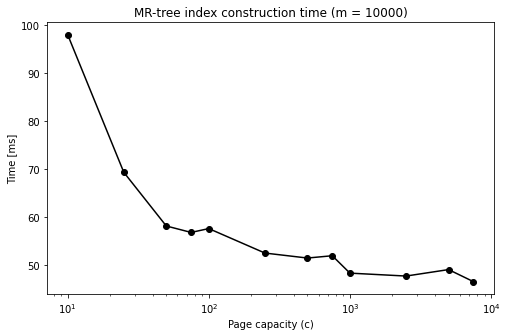

In [6]:
plt.figure(figsize=(8, 5))
plt.title("MR-tree index construction time (m = 10000)")
plt.xscale('log')
plt.plot(df1['c'], df1['time'], marker='o', color='black')
plt.ylabel("Time [ms]")
plt.xlabel("Page capacity (c)")
plt.savefig("test_construction_c.png", dpi=170, format='png', bbox_inches='tight')